In [ ]:
#Preparing the environment

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
#Data Loading and Observation

df = pd.read_csv('E:\BootCamp Assignments\ML_based_Chronic-_Kidney_Disease_Prediction\Chronic_Kidney_disease_dataset.csv')
df

<>:3: SyntaxWarning: invalid escape sequence '\B'
<>:3: SyntaxWarning: invalid escape sequence '\B'
C:\Users\Mudassir\AppData\Local\Temp\ipykernel_21260\431188717.py:3: SyntaxWarning: invalid escape sequence '\B'
  df = pd.read_csv('E:\BootCamp Assignments\ML_based_Chronic-_Kidney_Disease_Prediction\Chronic_Kidney_disease_dataset.csv')


,age,gender,blood_pressure,specific_gravity,albumin,sugar,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,anemia,pedal_edema,ckd
0,62,female,50.0,1.020,4,4,normal,absent,absent,98.1,...,38.3,10132,5.8,yes,yes,yes,good,yes,no,1
1,44,female,90.4,1.010,1,0,normal,absent,absent,186.2,...,41.0,6703,6.0,yes,yes,no,good,yes,no,0
2,20,male,65.1,1.010,0,0,normal,absent,absent,201.3,...,36.5,6712,5.6,yes,no,no,good,no,no,0
3,66,female,99.1,1.025,2,0,normal,absent,absent,151.9,...,38.1,5327,5.7,no,yes,yes,good,yes,no,0
4,54,male,70.2,1.020,1,0,normal,absent,absent,163.7,...,31.4,6573,3.9,yes,yes,no,good,yes,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,41,male,81.6,1.025,5,1,normal,present,absent,169.7,...,44.6,10646,4.6,yes,no,no,poor,yes,no,0
29996,42,female,81.7,1.025,2,1,normal,absent,absent,76.4,...,47.0,10273,5.2,no,no,no,good,no,yes,1
29997,37,male,79.2,1.015,2,0,normal,present,absent,103.4,...,33.8,9689,4.7,no,no,yes,good,no,no,0
29998,61,male,68.4,1.025,1,2,normal,absent,absent,191.3,...,48.7,6699,3.9,no,no,no,good,yes,no,0


In [11]:
# Data Understanding

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      30000 non-null  int64  
 1   gender                   30000 non-null  object 
 2   blood_pressure           30000 non-null  float64
 3   specific_gravity         30000 non-null  float64
 4   albumin                  30000 non-null  int64  
 5   sugar                    30000 non-null  int64  
 6   pus_cell                 30000 non-null  object 
 7   pus_cell_clumps          30000 non-null  object 
 8   bacteria                 30000 non-null  object 
 9   blood_glucose_random     30000 non-null  float64
 10  blood_urea               30000 non-null  float64
 11  serum_creatinine         30000 non-null  float64
 12  sodium                   30000 non-null  float64
 13  potassium                30000 non-null  float64
 14  hemoglobin            

In [7]:
df.describe()

# Fourteen Numerical Columns, excluding the Target Variable

,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,hemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,ckd
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,49.977067,80.676730,1.017245,2.417633,0.775133,123.433163,40.942673,2.083082,137.987707,4.505577,13.497323,41.991253,8486.678500,5.195840,0.165600
std,14.919311,18.929556,0.005613,1.461787,1.200479,54.003448,23.199416,1.333525,5.005188,0.700804,1.998484,5.011280,2461.036226,0.702358,0.371727
min,2.000000,50.000000,1.005000,0.000000,0.000000,50.000000,5.000000,0.300000,120.000000,2.500000,6.000000,25.000000,3000.000000,3.000000,0.000000
25%,40.000000,66.600000,1.015000,1.000000,0.000000,79.000000,23.300000,0.980000,134.600000,4.000000,12.100000,38.600000,6779.000000,4.700000,0.000000
50%,50.000000,80.200000,1.015000,2.000000,0.000000,119.700000,39.900000,1.980000,138.000000,4.500000,13.500000,42.000000,8462.000000,5.200000,0.000000
75%,60.000000,93.600000,1.020000,4.000000,1.000000,160.500000,56.700000,2.990000,141.400000,5.000000,14.800000,45.400000,10157.000000,5.700000,0.000000
max,90.000000,155.200000,1.025000,5.000000,5.000000,373.200000,135.600000,7.820000,155.000000,7.100000,20.000000,55.000000,18000.000000,7.500000,1.000000


In [8]:
df.describe(include='object')

# 10 Categorical Columns
# Needs encoding, Label encoding is the best for all of them.

,gender,pus_cell,pus_cell_clumps,bacteria,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,anemia,pedal_edema
count,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000
unique,2,2,2,2,2,2,2,2,2,2
top,male,normal,absent,absent,no,no,no,good,no,no
freq,16468,25488,26979,28564,19574,21061,27073,27008,17916,25545


In [9]:
# Checking for duplicates

df.duplicated().sum()

# Fortunately, we don't have any duplicate values in our data. It's all clean

np.int64(0)

In [12]:
# Quantifying missingness per column in percentages
missing_values = df.isna().sum()
pct_missing = missing_values/len(df)*100
pct_missing

# Fortunately, we don't have any missing vlaues in our  column either.
# The dataset seems to be well-maintained and collected

age                        0.0
gender                     0.0
blood_pressure             0.0
specific_gravity           0.0
albumin                    0.0
sugar                      0.0
pus_cell                   0.0
pus_cell_clumps            0.0
bacteria                   0.0
blood_glucose_random       0.0
blood_urea                 0.0
serum_creatinine           0.0
sodium                     0.0
potassium                  0.0
hemoglobin                 0.0
packed_cell_volume         0.0
white_blood_cell_count     0.0
red_blood_cell_count       0.0
hypertension               0.0
diabetes_mellitus          0.0
coronary_artery_disease    0.0
appetite                   0.0
anemia                     0.0
pedal_edema                0.0
ckd                        0.0
dtype: float64

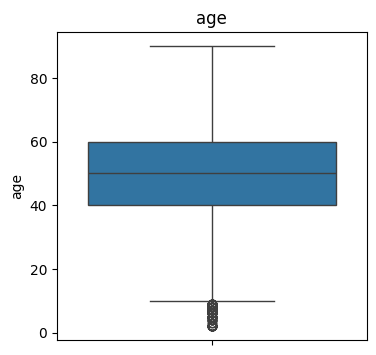

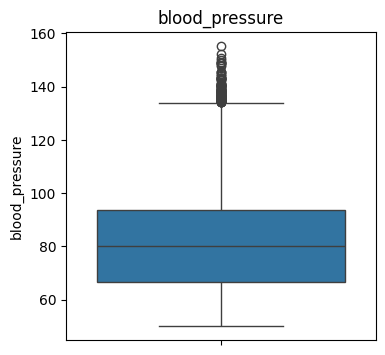

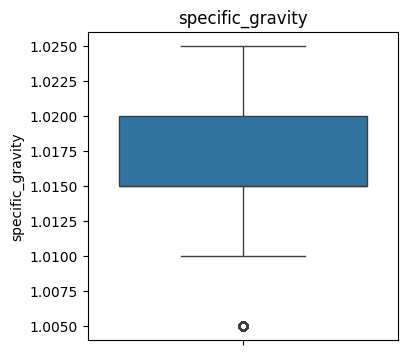

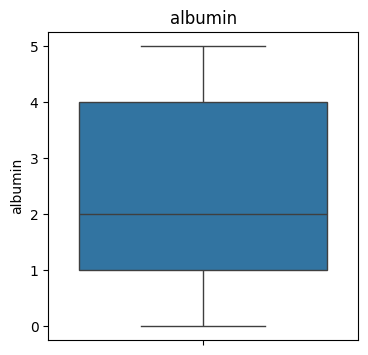

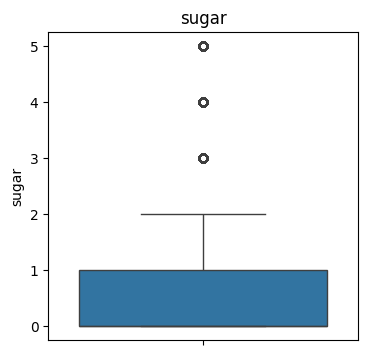

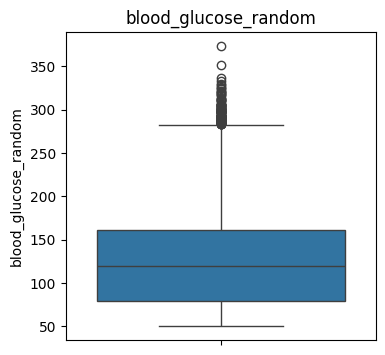

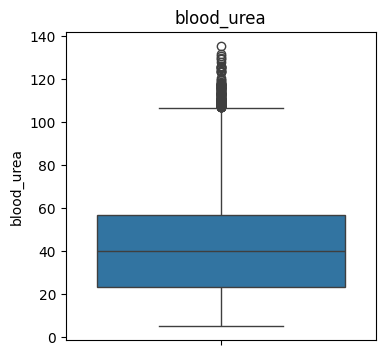

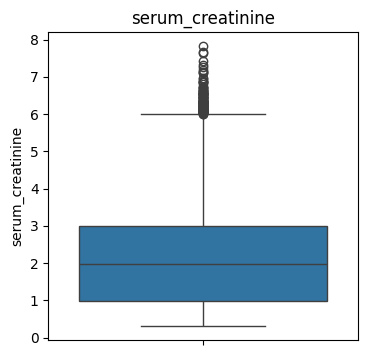

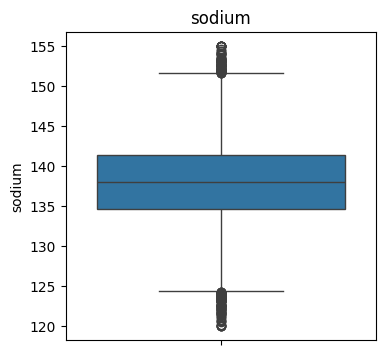

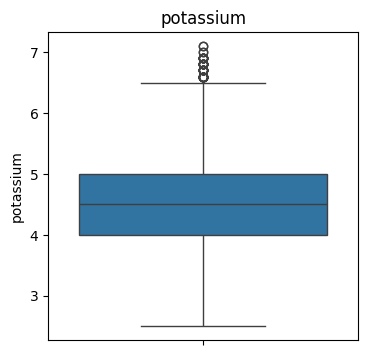

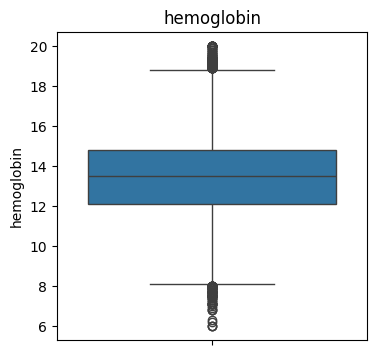

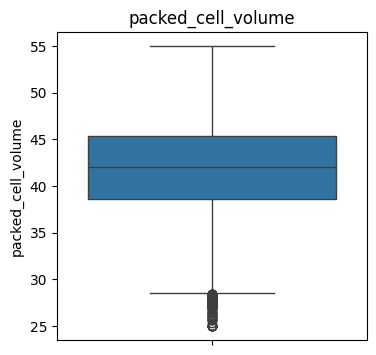

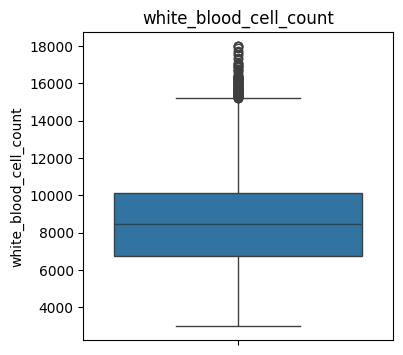

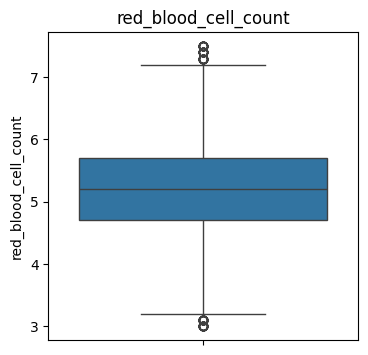

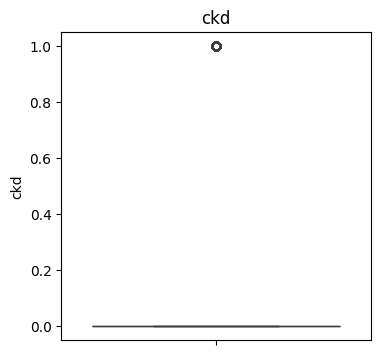

In [13]:
# Checing for outliers in our dataset

for col in df.select_dtypes(include="number").columns:
    plt.figure(figsize=(4,4))
    sns.boxplot(y=df[col])
    plt.title(col)
    plt.show()
    
# Well, our dataset seems to have a lot of outliers in each column


In [14]:
# Encoding Categorical Variables Using LabelEncoder
# I am using LabelEncoder for all the categorical variables as they all have only 2 unique values

from sklearn.preprocessing import LabelEncoder

binary_cols = [col for col in df.columns if df[col].nunique() == 2 and col != 'ckd']

for col in binary_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

display(df.head())

,age,gender,blood_pressure,specific_gravity,albumin,sugar,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,anemia,pedal_edema,ckd
0,62,0,50.0,1.020,4,4,1,0,0,98.1,...,38.3,10132,5.8,1,1,1,0,1,0,1
1,44,0,90.4,1.010,1,0,1,0,0,186.2,...,41.0,6703,6.0,1,1,0,0,1,0,0
2,20,1,65.1,1.010,0,0,1,0,0,201.3,...,36.5,6712,5.6,1,0,0,0,0,0,0
3,66,0,99.1,1.025,2,0,1,0,0,151.9,...,38.1,5327,5.7,0,1,1,0,1,0,0
4,54,1,70.2,1.020,1,0,1,0,0,163.7,...,31.4,6573,3.9,1,1,0,0,1,0,0


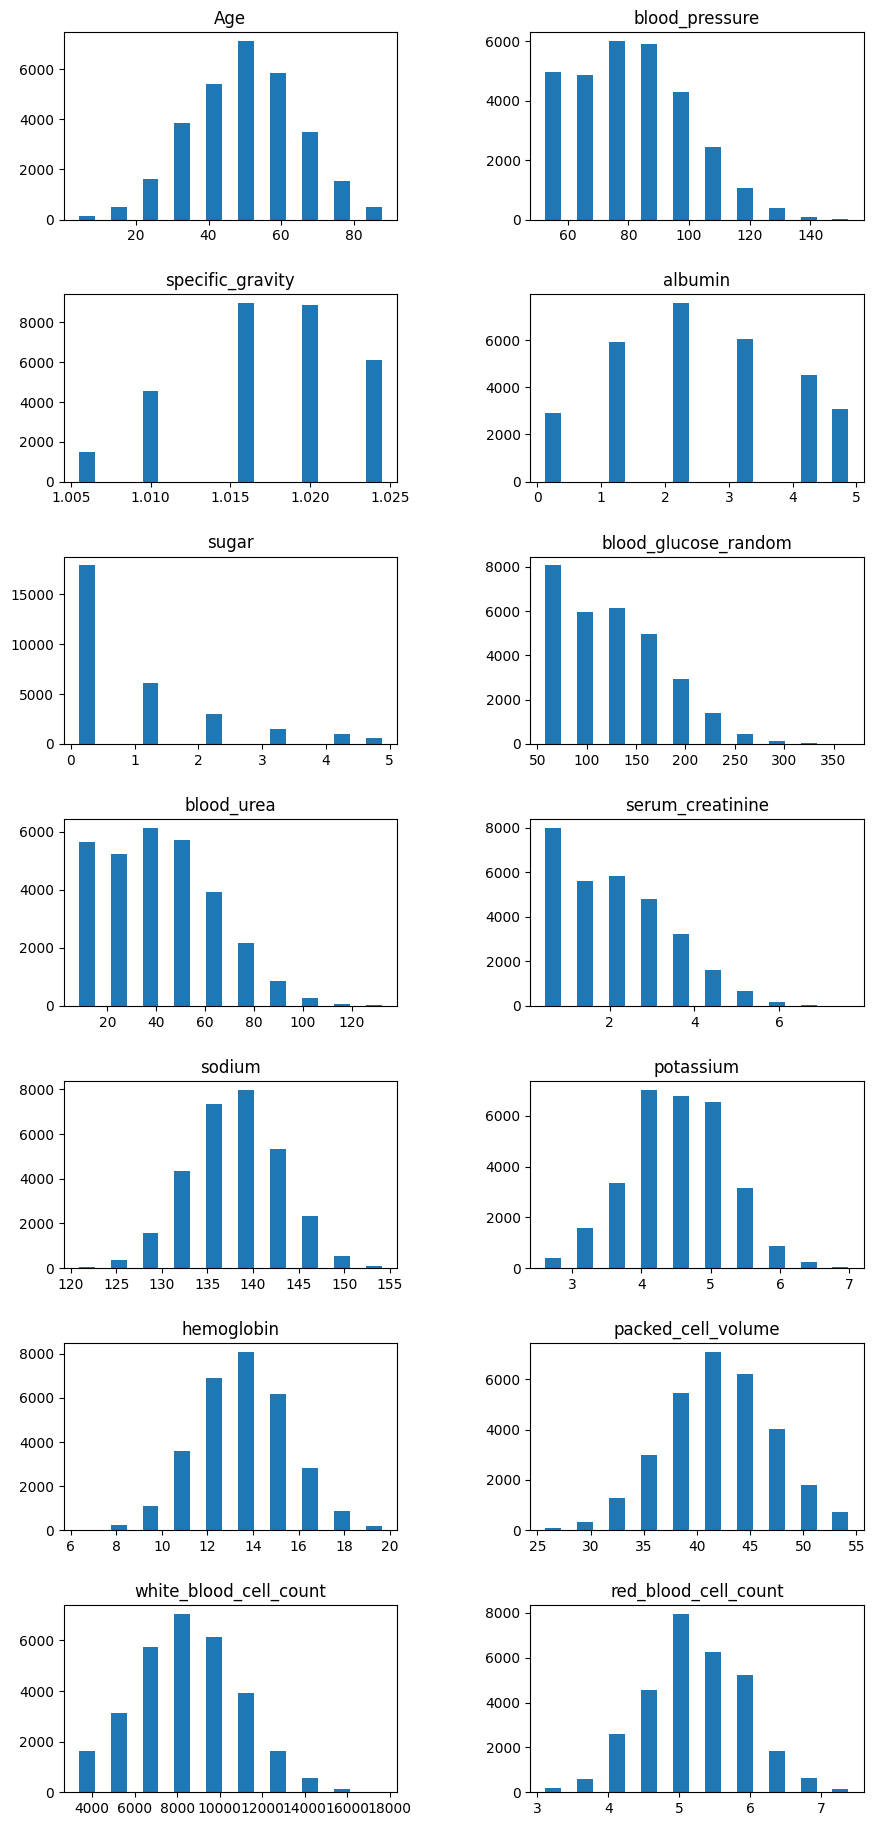

In [15]:
# Visualizing Numerical column and what value_counts they have through Histogram

fig, ax = plt.subplots(nrows = 7, ncols = 2, figsize = (10,22))

ax[0,0].hist(df['age'], rwidth = 0.5)
ax[0,1].hist(df['blood_pressure'], rwidth = 0.5)
ax[1,0].hist(df['specific_gravity'], rwidth = 0.5)
ax[1,1].hist(df['albumin'], rwidth = 0.5)
ax[2,0].hist(df['sugar'], rwidth = 0.5)
ax[2,1].hist(df['blood_glucose_random'], rwidth = 0.5)
ax[3,0].hist(df['blood_urea'], rwidth = 0.5)
ax[3,1].hist(df['serum_creatinine'], rwidth = 0.5)
ax[4,0].hist(df['sodium'], rwidth = 0.5)
ax[4,1].hist(df['potassium'], rwidth = 0.5)
ax[5,0].hist(df['hemoglobin'], rwidth = 0.5)
ax[5,1].hist(df['packed_cell_volume'], rwidth = 0.5)
ax[6,0].hist(df['white_blood_cell_count'], rwidth = 0.5)
ax[6,1].hist(df['red_blood_cell_count'], rwidth = 0.5)


ax[0,0].set_title('Age')
ax[0,1].set_title('blood_pressure')
ax[1,0].set_title('specific_gravity')
ax[1,1].set_title('albumin')
ax[2,0].set_title('sugar')
ax[2,1].set_title('blood_glucose_random')
ax[3,0].set_title('blood_urea')
ax[3,1].set_title('serum_creatinine')
ax[4,0].set_title('sodium')
ax[4,1].set_title('potassium')
ax[5,0].set_title('hemoglobin')
ax[5,1].set_title('packed_cell_volume')
ax[6,0].set_title('white_blood_cell_count')
ax[6,1].set_title('red_blood_cell_count')

plt.tight_layout()

plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.4, hspace=0.4)

plt.show()

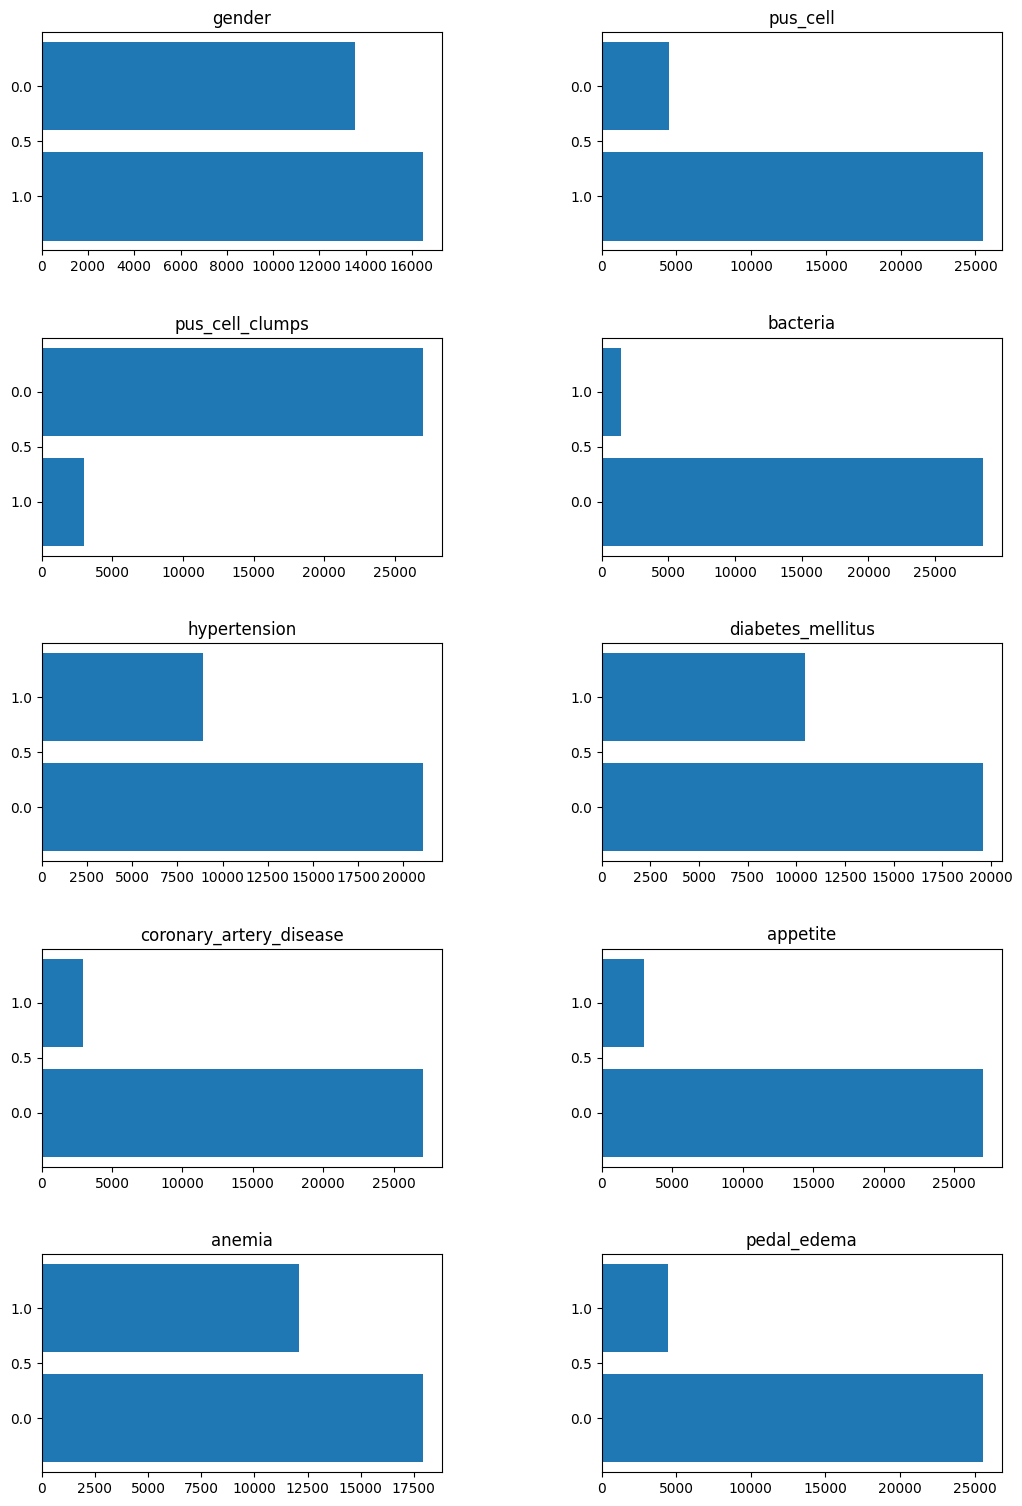

In [16]:
# Visualizing each Categorical Column and what is their  value_count through a bar chart

fig , ax=plt.subplots(nrows = 5, ncols = 2, figsize = (12,18))

ax[0,0].barh(df['gender'].value_counts().index, df['gender'].value_counts().values)
ax[0,1].barh(df['pus_cell'].value_counts().index, df['pus_cell'].value_counts().values)
ax[1,0].barh(df['pus_cell_clumps'].value_counts().index, df['pus_cell_clumps'].value_counts().values)
ax[1,1].barh(df['bacteria'].value_counts().index, df['bacteria'].value_counts().values)
ax[2,1].barh(df['hypertension'].value_counts().index, df['hypertension'].value_counts().values)
ax[2,0].barh(df['diabetes_mellitus'].value_counts().index, df['diabetes_mellitus'].value_counts().values)
ax[3,0].barh(df['coronary_artery_disease'].value_counts().index, df['coronary_artery_disease'].value_counts().values)
ax[3,1].barh(df['appetite'].value_counts().index, df['appetite'].value_counts().values)
ax[4,0].barh(df['anemia'].value_counts().index, df['anemia'].value_counts().values)
ax[4,1].barh(df['pedal_edema'].value_counts().index, df['pedal_edema'].value_counts().values)


ax[0,0].set_title('gender')
ax[0,1].set_title('pus_cell')
ax[1,0].set_title('pus_cell_clumps')
ax[1,1].set_title('bacteria')
ax[2,0].set_title('hypertension')
ax[2,1].set_title('diabetes_mellitus')
ax[3,0].set_title('coronary_artery_disease')
ax[3,1].set_title('appetite')
ax[4,0].set_title('anemia')
ax[4,1].set_title('pedal_edema')

ax[0,0].invert_yaxis()
ax[0,1].invert_yaxis()
ax[1,0].invert_yaxis()

plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.4, hspace=0.4)

plt.show()

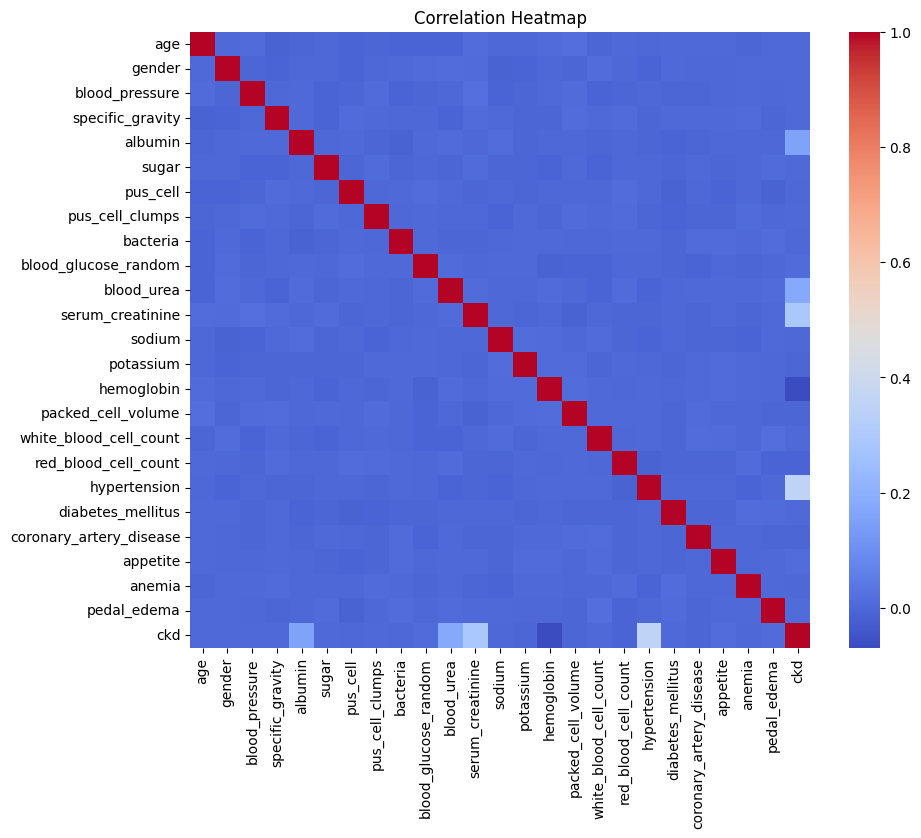

In [17]:
# Create a correlation heatmap

corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()